## Viz motifs

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Load data

In [20]:
all_motifs = pd.DataFrame({})

# Mowgli
motifs_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/enrich/motifs/"
for i in range(50):
    motifs = pd.read_csv(motifs_path + f"motifs_{i}.csv", index_col=0)
    motifs = motifs[motifs["p.adjust"] < .05]
    motifs = motifs[motifs["motif"].str.startswith("MA")]
    motifs["dim"] = i
    motifs["method"] = "mowgli"
    all_motifs = pd.concat((all_motifs, motifs))

# MOFA
motifs_path = "/users/csb/huizing/Documents/PhD/Code/mowgli_reproducibility/enrich/motifs_mofa/"
for i in range(15):
    motifs = pd.read_csv(motifs_path + f"motifs_{i}.csv", index_col=0)
    motifs = motifs[motifs["p.adjust"] < .05]
    motifs = motifs[motifs["motif"].str.startswith("MA")]
    motifs["dim"] = i
    motifs["method"] = "mofa"
    all_motifs = pd.concat((all_motifs, motifs))

In [23]:
all_motifs.head()

,motif,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,method
MA1513.1,MA1513.1,731,16004,73.1,32.023371,2.282708,2.300461e-159,KLF15,3.593320e-156,0,mowgli
MA0742.2,MA0742.2,719,16014,71.9,32.043381,2.243833,5.003803e-150,KLF12,2.605314e-147,0,mowgli
MA0516.3,MA0516.3,762,18130,76.2,36.277413,2.100481,4.812234e-149,SP2,1.879177e-146,0,mowgli
MA1511.2,MA1511.2,769,18621,76.9,37.259885,2.063882,6.622276e-147,KLF10,2.068799e-144,0,mowgli
MA1961.1,MA1961.1,801,20303,80.1,40.625500,1.971668,1.060434e-146,PATZ1,2.760664e-144,0,mowgli


## Count the motifs

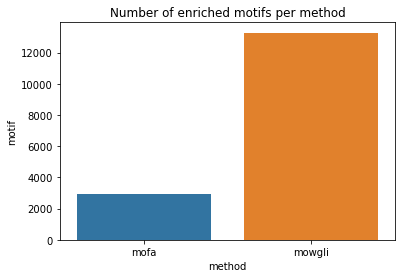

In [28]:
plt.title("Number of enriched motifs per method")
sns.barplot(data=all_motifs.groupby("method")["motif"].count().reset_index(), x="method", y="motif")
plt.show()

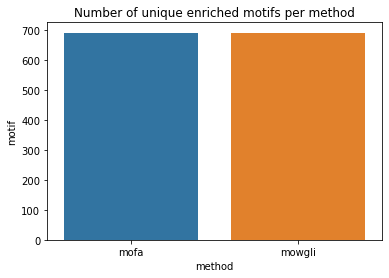

In [29]:
plt.title("Number of unique enriched motifs per method")
sns.barplot(data=all_motifs.groupby("method")["motif"].nunique().reset_index(), x="method", y="motif")
plt.show()
# All of them apparently...

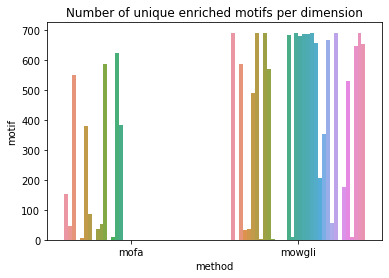

In [33]:
fig, ax = plt.subplots(1, 1)
sns.barplot(data=all_motifs.groupby(["method", "dim"])["motif"].nunique().reset_index(), x="method", hue='dim', y="motif", ax=ax)
ax.set_title("Number of unique enriched motifs per dimension")
ax.get_legend().remove()
plt.show()

## Check specificity

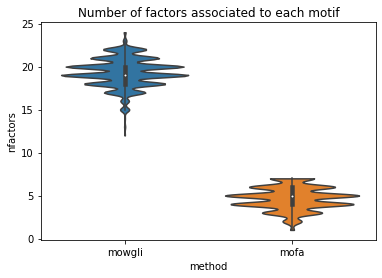

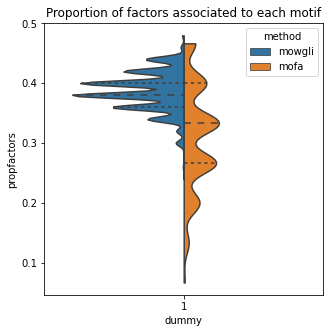

In [35]:
all_motifs["nfactors"] = 0
nfactors = all_motifs.groupby(["motif", "method"])["motif"].count()
all_motifs.set_index(["motif", "method"], inplace=True)
all_motifs.loc[nfactors.index, "nfactors"] = nfactors
all_motifs.reset_index(inplace=True)

plt.title("Number of factors associated to each motif")
sns.violinplot(data=all_motifs, x="method", y="nfactors", cut=0)
plt.show()

all_motifs["ndim"] = 0
all_motifs.loc[all_motifs["method"] == "mofa", "ndim"] = 15
all_motifs.loc[all_motifs["method"] == "mowgli", "ndim"] = 50
all_motifs["propfactors"] = all_motifs["nfactors"] / all_motifs["ndim"]
all_motifs["dummy"] = 1

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.set_title("Proportion of factors associated to each motif")
sns.violinplot(
    data=all_motifs,
    x="dummy",
    hue="method",
    y="propfactors",
    split=True,
    ax=ax,
    inner="quart",
    cut=0,
)
plt.show()


In [36]:
selectivity_mofa = (all_motifs[all_motifs["method"] == "mofa"]["motif"].nunique() + 15) / (2*all_motifs[all_motifs["method"] == "mofa"]["motif"].count())
selectivity_mowgli = (all_motifs[all_motifs["method"] == "mowgli"]["motif"].nunique() + 50) / (2*all_motifs[all_motifs["method"] == "mowgli"]["motif"].count())
print("Selectivity of MOFA+: {:.4f}".format(selectivity_mofa))
print("Selectivity of Mowgli: {:.4f}".format(selectivity_mowgli))

Selectivity of MOFA+: 0.1211
Selectivity of Mowgli: 0.0279


## Biology-driven check

In [46]:
idx = (all_motifs["method"] == "mofa")
idx &= (all_motifs["dim"] == 0)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
13278,MA0081.2,mofa,606,7221,60.721443,48.162476,1.260762,1.176912e-16,SPIB,3.676672e-14,0,6,15,0.400000,1
13279,MA0687.1,mofa,375,4028,37.575150,26.865871,1.398620,1.280789e-14,SPIC,3.334322e-12,0,5,15,0.333333,1
13280,MA1637.1,mofa,320,3529,32.064128,23.537651,1.362248,1.256912e-10,EBF3,2.454121e-08,0,6,15,0.400000,1
13281,MA0154.4,mofa,339,3878,33.967936,25.865404,1.313258,2.361955e-09,EBF1,2.635267e-07,0,6,15,0.400000,1
13282,MA1945.1,mofa,343,3986,34.368737,26.585740,1.292751,1.156819e-08,ETV5::FIGLA,1.129345e-06,0,6,15,0.400000,1
13283,MA1713.1,mofa,316,3653,31.663327,24.364704,1.299557,3.778715e-08,ZNF610,2.951177e-06,0,6,15,0.400000,1
13284,MA0101.1,mofa,233,2540,23.346693,16.941239,1.378098,4.943689e-08,REL,3.510019e-06,0,5,15,0.333333,1
13285,MA0524.2,mofa,238,2618,23.847695,17.461482,1.365731,7.298524e-08,TFAP2C,4.930085e-06,0,7,15,0.466667,1
13286,MA0107.1,mofa,259,2908,25.951904,19.395718,1.338022,9.749846e-08,RELA,6.091704e-06,0,5,15,0.333333,1
13287,MA0810.1,mofa,270,3093,27.054108,20.629627,1.311420,2.885922e-07,TFAP2A,1.502604e-05,0,7,15,0.466667,1


In [53]:
idx = (all_motifs["method"] == "mowgli")
idx &= (all_motifs["dim"] == 9)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
3223,MA1151.1,mowgli,259,4641,25.9,9.286457,2.789008,7.457896e-54,RORC,5.824616e-51,9,18,50,0.36,1
3224,MA0835.2,mowgli,374,9280,37.4,18.568913,2.014119,2.241879e-45,BATF3,1.167272e-42,9,18,50,0.36,1
3225,MA0462.2,mowgli,372,9234,37.2,18.476869,2.013328,4.987382e-45,BATF::JUN,1.947573e-42,9,18,50,0.36,1
3226,MA1634.1,mowgli,367,9152,36.7,18.312790,2.004064,8.428671e-44,BATF,2.351048e-41,9,18,50,0.36,1
3227,MA0099.3,mowgli,305,6971,30.5,13.948695,2.186584,2.935194e-42,FOS::JUN,5.429368e-40,9,18,50,0.36,1
3228,MA1928.1,mowgli,348,8566,34.8,17.140227,2.030311,3.128317e-42,BNC2,5.429368e-40,9,18,50,0.36,1
3229,MA1633.2,mowgli,318,7487,31.8,14.981191,2.122662,9.729906e-42,BACH1,1.519811e-39,9,18,50,0.36,1
3230,MA0491.2,mowgli,305,7042,30.5,14.090764,2.164538,2.188195e-41,JUND,2.848300e-39,9,15,50,0.30,1
3231,MA0476.1,mowgli,340,8363,34.0,16.734032,2.031788,4.136406e-41,FOS,4.970051e-39,9,19,50,0.38,1
3232,MA0490.2,mowgli,315,7512,31.5,15.031215,2.095639,3.776485e-40,JUNB,4.213478e-38,9,15,50,0.30,1


In [45]:
idx = (all_motifs["method"] == "mowgli")
idx &= (all_motifs["dim"] == 33)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
9149,MA1959.1,mowgli,685,18504,68.568569,37.025772,1.851915,1.329013e-92,KLF7,1.037959e-89,33,20,50,0.40,1
9150,MA0493.2,mowgli,717,20213,71.771772,40.445414,1.774534,4.144869e-91,KLF1,2.158095e-88,33,21,50,0.42,1
9151,MA1961.1,mowgli,716,20303,71.671672,40.625500,1.764204,1.718752e-89,PATZ1,4.474483e-87,33,19,50,0.38,1
9152,MA0516.3,mowgli,671,18130,67.167167,36.277413,1.851487,4.938802e-89,SP2,9.643012e-87,33,18,50,0.36,1
9153,MA1513.1,mowgli,625,16004,62.562563,32.023371,1.953653,5.825556e-89,KLF15,1.011058e-86,33,18,50,0.36,1
9154,MA0742.2,mowgli,625,16014,62.562563,32.043381,1.952433,7.768769e-89,KLF12,1.213482e-86,33,18,50,0.36,1
9155,MA0599.1,mowgli,752,22242,75.275275,44.505363,1.691375,9.810861e-89,KLF5,1.393142e-86,33,21,50,0.42,1
9156,MA1723.1,mowgli,813,25694,81.381381,51.412678,1.582905,2.329539e-88,PRDM9,3.032284e-86,33,23,50,0.46,1
9157,MA0740.2,mowgli,617,15718,61.761762,31.451097,1.963740,4.717799e-88,KLF14,5.668617e-86,33,19,50,0.38,1
9158,MA0685.2,mowgli,680,18669,68.068068,37.355931,1.822149,8.873642e-88,SP4,7.776868e-86,33,19,50,0.38,1


In [47]:
idx = (all_motifs["method"] == "mowgli")
idx &= (all_motifs["dim"] == 2)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
692,MA0800.1,mowgli,291,6745,29.1,13.496478,2.156118,7.420473e-39,EOMES,5.359197e-36,2,18,50,0.36,1
693,MA0802.1,mowgli,313,7749,31.3,15.505443,2.018646,1.166246e-36,TBR1,3.643354e-34,2,18,50,0.36,1
694,MA0805.1,mowgli,333,8622,33.3,17.252281,1.930180,1.601459e-35,TBX1,4.169131e-33,2,19,50,0.38,1
695,MA0690.2,mowgli,274,6740,27.4,13.486474,2.031665,7.467420e-32,TBX21,1.666301e-29,2,17,50,0.34,1
696,MA1566.2,mowgli,307,8009,30.7,16.025692,1.915674,1.257464e-31,TBX3,2.455199e-29,2,18,50,0.36,1
697,MA1565.1,mowgli,399,11733,39.9,23.477269,1.699516,1.460825e-31,TBX18,2.535344e-29,2,20,50,0.40,1
698,MA0689.1,mowgli,298,7675,29.8,15.357372,1.940436,1.624769e-31,TBX20,2.537890e-29,2,18,50,0.36,1
699,MA0688.1,mowgli,283,7330,28.3,14.667040,1.929496,2.848306e-29,TBX2,3.707545e-27,2,19,50,0.38,1
700,MA0801.1,mowgli,296,8044,29.6,16.095726,1.838998,2.746654e-27,MGA,2.523691e-25,2,19,50,0.38,1
701,MA0803.1,mowgli,296,8044,29.6,16.095726,1.838998,2.746654e-27,TBX15,2.523691e-25,2,19,50,0.38,1


In [48]:
idx = (all_motifs["method"] == "mofa")
idx &= (all_motifs["dim"] == 2)
all_motifs.loc[idx][:10]

,motif,method,observed,background,percent.observed,percent.background,fold.enrichment,pvalue,motif.name,p.adjust,dim,nfactors,ndim,propfactors,dummy
13476,MA0800.1,mofa,337,3003,33.7,20.029347,1.682531,5.170329e-26,EOMES,4.038027e-23,2,4,15,0.266667,1
13477,MA0802.1,mofa,368,3416,36.8,22.783966,1.615171,2.096930e-25,TBR1,1.091802e-22,2,4,15,0.266667,1
13478,MA0805.1,mofa,383,3723,38.3,24.831588,1.542390,1.109493e-22,TBX1,3.466055e-20,2,3,15,0.200000,1
13479,MA0690.2,mofa,322,2982,32.2,19.889282,1.618962,1.018162e-21,TBX21,2.650616e-19,2,4,15,0.266667,1
13480,MA1566.2,mofa,360,3485,36.0,23.244181,1.548775,2.753554e-21,TBX3,5.376313e-19,2,5,15,0.333333,1
13481,MA0688.1,mofa,333,3151,33.3,21.016474,1.584471,5.363394e-21,TBX2,7.261248e-19,2,4,15,0.266667,1
13482,MA0801.1,mofa,353,3408,35.3,22.730608,1.552972,5.578423e-21,MGA,7.261248e-19,2,3,15,0.200000,1
13483,MA0803.1,mofa,353,3408,35.3,22.730608,1.552972,5.578423e-21,TBX15,7.261248e-19,2,3,15,0.200000,1
13484,MA1565.1,mofa,452,4756,45.2,31.721470,1.424902,1.866247e-20,TBX18,2.242368e-18,2,6,15,0.400000,1
13485,MA0689.1,mofa,338,3309,33.8,22.070299,1.531470,7.060084e-19,TBX20,6.493533e-17,2,5,15,0.333333,1
